# Emotion Recognition (EDA and Text Pre-Processing)
Steps to run this code <br>
1. Install Anaconda (a free and open-source distribution of the Python and R programming languages for scientific computing, that aims to simplify package management and deployment), follow the steps in this following link https://www.anaconda.com/distribution/, pick the package suitable to your OS
2. Install wordcloud library https://anaconda.org/conda-forge/wordcloud or https://pypi.org/project/wordcloud/
3. Download the dataset from http://saifmohammad.com/WebPages/EmotionIntensity-SharedTask.html 

## Load Training Data

In [1]:
import pandas as pd
import numpy as np
import string

cols = ['id','text','label','intensity']

anger = pd.read_csv('anger_train.txt', header=None, sep="\t", names= cols, index_col=0)
fear = pd.read_csv('fear_train.txt', header=None, sep="\t", names= cols, index_col=0)
sad = pd.read_csv('sadness_train.txt', header=None, sep="\t", names= cols, index_col=0)
joy = pd.read_csv('joy_train.txt', header=None, sep="\t", names= cols, index_col=0)

print (joy.head(20))

                                                    text label  intensity
id                                                                       
30000  Just got back from seeing @GaryDelaney in Burs...   joy      0.980
30001  Oh dear an evening of absolute hilarity I don'...   joy      0.958
30002  Been waiting all week for this game ❤️❤️❤️ #ch...   joy      0.940
30003  @gardiner_love : Thank you so much, Gloria! Yo...   joy      0.938
30004  I feel so blessed to work with the family that...   joy      0.938
30005  Today I reached 1000 subscribers on YT!! , #go...   joy      0.926
30006  @Singaholic121 Good morning, love! Happy first...   joy      0.924
30007  #BridgetJonesBaby is the best thing I've seen ...   joy      0.922
30008  Just got back from seeing @GaryDelaney in Burs...   joy      0.920
30009  @IndyMN I thought the holidays could not get a...   joy      0.917
30010               I'm just still . So happy .\nA blast   joy      0.917
30011                   It's meant to 

In [2]:
frames = [anger, fear, sad, joy]
data_training = pd.concat(frames)
data_training.reset_index(inplace=True)
print (data_training.head(20))
data_training.label.value_counts()

       id                                               text  label intensity
0   10000  How the fu*k! Who the heck! moved my fridge!.....  anger     0.938
1   10001  So my Indian Uber driver just called someone t...  anger     0.896
2   10002  @DPD_UK I asked for my parcel to be delivered ...  anger     0.896
3   10003  so ef whichever butt wipe pulled the fire alar...  anger     0.896
4   10004  Don't join @BTCare they put the phone down on ...  anger     0.896
5   10005                                My blood is boiling  anger     0.875
6   10006  When you've still got a whole season of Wentwo...  anger     0.875
7   10007  @bt_uk why does tracking show my equipment del...  anger     0.875
8   10008  @TeamShanny legit why i am so furious with him...  anger     0.875
9   10009  How is it suppose to work if you do that? Wtf ...  anger     0.875
10  10010  im so mad about power rangers. im incensed. im...  anger     0.667
11  10011  Wont use using @mothercareuk @Mothercarehelp a...  an

fear       1147
anger       857
joy         823
sadness     786
Name: label, dtype: int64

In [3]:
punc = string.punctuation
data_training['word_count'] = data_training['text'].apply(lambda x : len(x.split()))
data_training['char_count'] = data_training['text'].apply(lambda x : len(x.replace(" ","")))
data_training['punc_count'] = data_training['text'].apply(lambda x : len([a for a in x if a in punc]))

data_training[['word_count', 'char_count', 'punc_count']].head(10)

,word_count,char_count,punc_count
0,18,79,12
1,23,97,4
2,19,90,4
3,24,111,13
4,24,102,6
5,4,16,0
6,25,108,6
7,22,115,9
8,14,66,3
9,17,62,3


In [4]:
from collections import Counter
# join_text = " ".join(data_training.text)
join_text = " ".join(data_training[data_training['label']=="sadness"]['text'].values)
counter_obj = Counter(join_text.split(" "))
counter_obj.most_common(50)
# print (join_text)

[('the', 354),
 ('to', 292),
 ('a', 272),
 ('I', 251),
 ('and', 225),
 ('of', 170),
 ('', 161),
 ('is', 154),
 ('in', 153),
 ('for', 108),
 ('my', 100),
 ('you', 99),
 ('that', 89),
 ('it', 88),
 ('on', 88),
 ('be', 83),
 ('have', 79),
 ('with', 76),
 ('not', 72),
 ('me', 67),
 ('so', 63),
 ('but', 59),
 ("I'm", 56),
 ('at', 54),
 ('get', 52),
 ('this', 49),
 ('are', 47),
 ('was', 47),
 ('when', 45),
 ('your', 45),
 ("it's", 43),
 ('all', 42),
 ('or', 42),
 ('&amp;', 41),
 ('will', 41),
 ('just', 40),
 ('i', 40),
 ('they', 39),
 ('can', 39),
 ("don't", 38),
 ('The', 38),
 ('do', 37),
 ('as', 35),
 ('no', 35),
 ('like', 35),
 ('#lost', 34),
 ('about', 33),
 ('-', 32),
 ('he', 31),
 ('by', 29)]

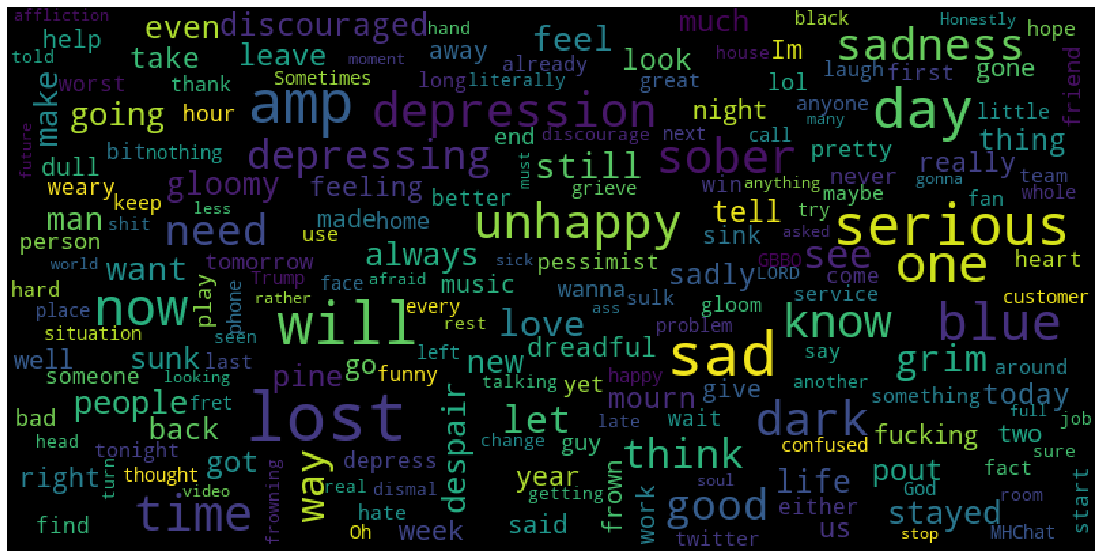

In [5]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt

stopwords = set(STOPWORDS)

# Create and generate a word cloud image:
wordcloud = WordCloud(max_font_size=50, background_color="black", stopwords = stopwords, width=800, height=400).generate(join_text)

# Display the generated image:
plt.figure( figsize=(20,10) )
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

## Text Pre-Processing

In [6]:
import nltk

In [7]:
import re
from nltk.tokenize import WordPunctTokenizer
from nltk.corpus import stopwords
tok = WordPunctTokenizer()
pat1 = r'@[A-Za-z_0-9]+'
pat2 = r'https?://[A-Za-z0-9./]+'
pat3 = r'[0-9]+'
combined_pat = r'|'.join((pat1, pat2, pat3))
stop_words = set(stopwords.words('english')) 

def tweet_cleaner(data_frame):
    print ("Cleaning and parsing the tweets...\n")
    clean_data = []
    for index, row in data_frame.iterrows():
        stripped = re.sub(combined_pat, '', row.text)
        lower_case = stripped.lower()
        words = tok.tokenize(lower_case)
        filtered_words = [w for w in words if not w in stop_words] 
        clean_data.append((" ".join(filtered_words)).strip())
        
    print ("Done!")
    return clean_data

In [8]:
clean_data_training_list= tweet_cleaner(data_training)

Cleaning and parsing the tweets...

Done!


In [9]:
data_training.text = pd.DataFrame(clean_data_training_list)
data_training.head(10)

,id,text,label,intensity,word_count,char_count,punc_count
0,10000,fu * k ! heck ! moved fridge !... knock landlo...,anger,0.938,18,79,12
1,10001,indian uber driver called someone n word . ' m...,anger,0.896,23,97,4
2,10002,asked parcel delivered pick store address # fu...,anger,0.896,19,90,4
3,10003,ef whichever butt wipe pulled fire alarm davis...,anger,0.896,24,111,13
4,10004,"' join put phone , talk rude . taking money ac...",anger,0.896,24,102,6
5,10005,blood boiling,anger,0.875,4,16,0
6,10006,' still got whole season wentworth watch stupi...,anger,0.875,25,108,6
7,10007,"tracking show equipment delivered , ' ? servic...",anger,0.875,22,115,9
8,10008,"legit furious , people fucking idiots .",anger,0.875,14,66,3
9,10009,suppose work ? wtf dude ? thanks pissing .,anger,0.875,17,62,3


In [10]:
data_training.label.value_counts()

fear       1147
anger       857
joy         823
sadness     786
Name: label, dtype: int64

In [11]:
data_training.to_csv('emotion_training.csv',encoding='utf-8')

## Feature Extraction (Bag of Words)

1. "It was the best of times"
2. "It was the worst of times"
3. "It was the age of wisdom"
4. "It was the age of foolishness"

**Vocabulary**
‘It’, ‘was’, ‘the’, ‘best’, ‘of’, ‘times’, ‘worst’, ‘age’, ‘wisdom’, ‘foolishness’

BoW representation <br>
1. "It was the best of times" = [1, 1, 1, 1, 1, 1, 0, 0, 0, 0]
2. "It was the worst of times" = [1, 1, 1, 0, 1, 1, 1, 0, 0, 0]
3. "It was the age of wisdom" = [1, 1, 1, 0, 1, 0, 0, 1, 1, 0]
4. "It was the age of foolishness" = [1, 1, 1, 0, 1, 0, 0, 1, 0, 1]


In [12]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(max_features=500)
X_BoW = vectorizer.fit_transform(data_training.text)
print(vectorizer.get_feature_names())

['absolutely', 'accept', 'act', 'actually', 'afraid', 'alarm', 'almost', 'already', 'also', 'always', 'amazing', 'america', 'amp', 'anger', 'angry', 'animated', 'another', 'anxiety', 'anyone', 'anything', 'around', 'asked', 'ass', 'attack', 'away', 'awe', 'awful', 'back', 'bad', 'bb', 'bc', 'beautiful', 'believe', 'best', 'better', 'big', 'birthday', 'bit', 'bitter', 'black', 'blame', 'blood', 'blues', 'boiling', 'book', 'boy', 'break', 'breezy', 'bright', 'broadcast', 'bully', 'burning', 'burst', 'call', 'called', 'car', 'care', 'cause', 'change', 'charlotte', 'cheer', 'cheerful', 'cheerfully', 'cheering', 'cheery', 'child', 'chirp', 'city', 'class', 'come', 'comes', 'coming', 'concern', 'contact', 'could', 'country', 'cry', 'crying', 'customer', 'cut', 'damn', 'dark', 'date', 'day', 'days', 'delight', 'depressing', 'depression', 'despair', 'die', 'discouraged', 'dog', 'done', 'dont', 'dreadful', 'dream', 'drop', 'dull', 'eat', 'either', 'elated', 'else', 'end', 'enough', 'episode', '

In [13]:
print(len(vectorizer.get_feature_names()))

500


In [14]:
transformed_BoW = vectorizer.transform(["The weather sure matches the mood in this state today"])
print (transformed_BoW)

  (0, 406)	1
  (0, 432)	1


In [15]:
print (transformed_BoW.toarray())

[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 

## Feature Extraction (Tf-IDF)
Tf-IDF stands for **term frequency-inverse document frequency**, and the tf-idf weight is a weight often used in information retrieval and text mining. This weight is a statistical measure used to evaluate how important a word is to a document in a collection or corpus. **The importance increases proportionally to the number of times a word appears in the document but is offset by the frequency of the word in the corpus** 

**TF: Term Frequency**, which measures how frequently a term occurs in a document. Since every document is different in length, it is possible that a term would appear much more times in long documents than shorter ones. Thus, the term frequency is often divided by the document length (aka. the total number of terms in the document) as a way of normalization:

TF(t) = (Number of times term t appears in a document) / (Total number of terms in the document).

**IDF: Inverse Document Frequency**, which measures how important a term is. While computing TF, all terms are considered equally important. However it is known that certain terms, such as "is", "of", and "that", may appear a lot of times but have little importance. Thus we need to weigh down the frequent terms while scale up the rare ones, by computing the following:

IDF(t) = log_e(Total number of documents / Number of documents with term t in it). (source: http://www.tfidf.com/)

In [16]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer_tfidf = TfidfVectorizer(max_features=500)
X_tfidf = vectorizer_tfidf.fit_transform(data_training.text)
print(vectorizer_tfidf.get_feature_names())

['absolutely', 'accept', 'act', 'actually', 'afraid', 'alarm', 'almost', 'already', 'also', 'always', 'amazing', 'america', 'amp', 'anger', 'angry', 'animated', 'another', 'anxiety', 'anyone', 'anything', 'around', 'asked', 'ass', 'attack', 'away', 'awe', 'awful', 'back', 'bad', 'bb', 'bc', 'beautiful', 'believe', 'best', 'better', 'big', 'birthday', 'bit', 'bitter', 'black', 'blame', 'blood', 'blues', 'boiling', 'book', 'boy', 'break', 'breezy', 'bright', 'broadcast', 'bully', 'burning', 'burst', 'call', 'called', 'car', 'care', 'cause', 'change', 'charlotte', 'cheer', 'cheerful', 'cheerfully', 'cheering', 'cheery', 'child', 'chirp', 'city', 'class', 'come', 'comes', 'coming', 'concern', 'contact', 'could', 'country', 'cry', 'crying', 'customer', 'cut', 'damn', 'dark', 'date', 'day', 'days', 'delight', 'depressing', 'depression', 'despair', 'die', 'discouraged', 'dog', 'done', 'dont', 'dreadful', 'dream', 'drop', 'dull', 'eat', 'either', 'elated', 'else', 'end', 'enough', 'episode', '

In [17]:
transformed_tfidf = vectorizer_tfidf.transform(["The weather sure matches the mood in this state today"])
print (transformed_tfidf)

  (0, 432)	0.6329234562771724
  (0, 406)	0.7742143750242294


In [18]:
print (transformed_tfidf.toarray())

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.   

## Emotion Recognition as Text Classification

![alt text](supervised-classification.png "Learning to Classifying text (source: https://www.nltk.org/book/ch06.html")
Learning to Classifying text (source: https://www.nltk.org/book/ch06.html

In [49]:
from sklearn import svm

Y_training = data_training.label
clf = svm.SVC(kernel='linear')
print("Training Classifier with BoW representation")
clf.fit(X_BoW, Y_training)

Training Classifier with BoW representation


SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [50]:
cols = ['id','text','label','intensity']

anger_test = pd.read_csv('anger_test.txt', header=None, sep="\t", names= cols, index_col=0)
fear_test = pd.read_csv('fear_test.txt', header=None, sep="\t", names= cols, index_col=0)
sad_test = pd.read_csv('sadness_test.txt', header=None, sep="\t", names= cols, index_col=0)
joy_test = pd.read_csv('joy_test.txt', header=None, sep="\t", names= cols, index_col=0)

frames_test = [anger_test, fear_test, sad_test, joy_test]
data_test = pd.concat(frames_test)
data_test.reset_index(inplace=True)
print (data_test.head(20))
data_test.label.value_counts()

       id                                               text  label  intensity
0   10941  At the point today where if someone says somet...  anger      0.319
1   10942  @CorningFootball  IT'S GAME DAY!!!!      T MIN...  anger      0.144
2   10943  This game has pissed me off more than any othe...  anger      0.898
3   10944  @spamvicious I've just found out it's Candice ...  anger      0.271
4   10945  @moocowward @mrsajhargreaves @Melly77 @GaryBar...  anger      0.646
5   10946  @moocowward @mrsajhargreaves @Melly77 @GaryBar...  anger      0.583
6   10947  wanna go home and focus up on this game . Don'...  anger      0.375
7   10948  @virginmedia I've been disconnected whilst on ...  anger      0.625
8   10949  @virginmedia I've been disconnected whilst on ...  anger      0.396
9   10950  I wanna see you smile I don't wanna see you ma...  anger      0.250
10  10951       @shae_caitlin ur road rage gives me anxiety.  anger      0.438
11  10952                     @eMilsOnWheels I'm fur

fear       995
anger      760
joy        714
sadness    673
Name: label, dtype: int64

In [51]:
clean_data_test_list= tweet_cleaner(data_test)
data_test.text = pd.DataFrame(clean_data_test_list)
data_test.head(10)

Cleaning and parsing the tweets...

Done!


,id,text,label,intensity
0,10941,point today someone says something remotely ki...,anger,0.319
1,10942,' game day !!!! minus : # relentless,anger,0.144
2,10943,game pissed game year . blood boiling ! time t...,anger,0.898
3,10944,' found ' candice candace . pout likes 😍,anger,0.271
4,10945,' come mum ' th k tweets 🙈 # soreloser,anger,0.646
5,10946,' come mum ' th k tweets 🙈 # bitter # soreloser,anger,0.583
6,10947,wanna go home focus game . ' wanna rage,anger,0.375
7,10948,' disconnected whilst holiday 😤 ' move house s...,anger,0.625
8,10949,' disconnected whilst holiday 😤 ' move house s...,anger,0.396
9,10950,wanna see smile ' wanna see make frown,anger,0.250


In [52]:
X_BoW_test = vectorizer.transform(data_test.text)
Y_test = data_test.label

## Evaluation
source: https://towardsdatascience.com/the-5-classification-evaluation-metrics-you-must-know-aa97784ff226
![alt text](evaluation.png "Confusion Matrix")

### Accuracy
$Accuracy = \frac{TP+TN}{TP+FP+FN+TN)}$ <br>
Accuracy is a valid choice of evaluation for classification problems which are well balanced and not skewed or No class imbalance.

### Precision
$Precision = \frac{TP}{TP+FP}$ <br>
Precision answers the following question: what proportion of predicted Positives is truly Positive?

### Recall
$Recall = \frac{TP}{TP+FN}$ <br>
Recall answers the following question: what proportion of actual Positives is correctly classified?

### F1-Score
$F1 = 2*\frac{precision*recall}{precision+recall}$ <br>
F1 score sort of maintains a balance between the precision and recall for your classifier.

*If you are a police inspector and you want to catch criminals, you want to be sure that the person you catch is a criminal (Precision) and you also want to capture as many criminals (Recall) as possible. The F1 score manages this tradeoff*

In [53]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

prediction = clf.predict(X_BoW_test)
accuracy = accuracy_score(Y_test, prediction)

# 'micro':Calculate metrics globally by counting the total true positives, false negatives and false positives.
precision = precision_score(Y_test, prediction, average="micro")
recall = recall_score(Y_test, prediction, average="micro")
F1 = f1_score(Y_test, prediction, average="micro")
print ('Accuracy:', accuracy)
print ('Precision:', precision)
print ('Recall:', recall)
print ('F1:', F1)

Accuracy: 0.7348822406110758
Precision: 0.7348822406110758
Recall: 0.7348822406110758
F1: 0.7348822406110759


In [54]:
#'macro':Calculate metrics for each label, and find their unweighted mean. This does not take label imbalance into account.
precision = precision_score(Y_test, prediction, average="macro")
recall = recall_score(Y_test, prediction, average="macro")
F1 = f1_score(Y_test, prediction, average="macro")
print ('Precision:', precision)
print ('Recall:', recall)
print ('F1:', F1)

Precision: 0.7515294254824031
Recall: 0.7271537615074718
F1: 0.7357228658048169


In [55]:
X_tfidf_test = vectorizer_tfidf.transform(data_test.text)
print("Training Classifier with Tfidf representation")
clf.fit(X_tfidf, Y_training)

Training Classifier with Tfidf representation


SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [56]:
prediction_tfidf = clf.predict(X_tfidf_test)
accuracy_tfidf = accuracy_score(Y_test, prediction_tfidf)

# 'micro':Calculate metrics globally by counting the total true positives, false negatives and false positives.
precision_tfidf = precision_score(Y_test, prediction_tfidf, average="micro")
recall_tfidf = recall_score(Y_test, prediction_tfidf, average="micro")
F1_tfidf = f1_score(Y_test, prediction_tfidf, average="micro")
print ('Accuracy:', accuracy_tfidf)
print ('Precision:', precision_tfidf)
print ('Recall:', recall_tfidf)
print ('F1:', F1_tfidf)

Accuracy: 0.75493316359007
Precision: 0.75493316359007
Recall: 0.75493316359007
F1: 0.7549331635900699


In [48]:
precision_tfidf = precision_score(Y_test, prediction_tfidf, average="macro")
recall_tfidf = recall_score(Y_test, prediction_tfidf, average="macro")
F1_tfidf = f1_score(Y_test, prediction_tfidf, average="macro")
print ('Precision:', precision_tfidf)
print ('Recall:', recall_tfidf)
print ('F1:', F1_tfidf)

Precision: 0.7635306830072374
Recall: 0.7315009983217239
F1: 0.7418755829707557


In [58]:
from sklearn.feature_selection import RFE

In [61]:
rfe = RFE(clf, 200)
rfe = rfe.fit(X_tfidf, Y_training)

In [62]:
print(rfe.support_)
print(rfe.ranking_)

[False  True False False  True False  True False False False  True False
 False  True  True  True False  True  True False  True False False False
 False  True  True False False  True  True  True  True False False False
 False False  True False  True  True  True  True  True False False  True
  True  True  True  True  True False  True False False  True  True False
  True  True  True  True  True False  True False False False False False
 False False False False False False False False False  True  True  True
  True  True  True  True  True False  True False False False  True False
 False  True  True  True  True False False  True  True False False False
 False False False False  True  True  True False False False False False
 False  True False False False  True False False False  True False False
  True False  True False  True False  True  True False  True  True False
  True  True  True  True False False False False False False False False
  True  True  True False False  True  True  True Fa